### Numpy array vs Python lists

In [23]:
a = [ i for i in range(10000000)]
b = [ i for i in range(10000000,20000000)]

c = []

import time

start = time.time()
for i in range(len(a)):
    c.append(a[i]+b[i])
print(time.time()-start)

1.6905674934387207


In [24]:
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)
start = time.time()
c = a + b 
print(time.time() - start )


0.12242531776428223


In [25]:
a = [ i for i in range(10000000)]
import sys
sys.getsizeof(a)

89095160

### Advanced Indexing

In [26]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [27]:
a[1,2]

np.int64(6)

In [28]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [29]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [30]:
#boolean masking
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[37, 18, 61, 30],
       [21, 50,  1, 23],
       [91, 10, 69, 10],
       [55, 77, 14, 13],
       [ 1, 26, 84, 78],
       [58, 71, 85,  9]], dtype=int32)

In [31]:
a[a>50]

array([61, 91, 69, 55, 77, 84, 78, 58, 71, 85], dtype=int32)

In [32]:
a[a%2==0]

array([18, 30, 50, 10, 10, 14, 26, 84, 78, 58], dtype=int32)

In [33]:
a[(a>50)&(a%2==0)]

array([84, 78, 58], dtype=int32)

In [34]:
a[~ (a % 7 == 0)]

array([37, 18, 61, 30, 50,  1, 23, 10, 69, 10, 55, 13,  1, 26, 78, 58, 71,
       85,  9], dtype=int32)

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [35]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [36]:
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1, 3)
print(a)
print(b)
print(a+b)


[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [37]:
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)
print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [38]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [40]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3, 1)
print(a)
print(b)
print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [42]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a)
print(b)
print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [44]:
a = np.array([1])
b = np.arange(4).reshape(2,2)
print(a)
print(b)
print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [45]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4, 3)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [46]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)
print(a)
print(b)
print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [47]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [49]:
def sigmoid(array):
    return 1/(1+np.exp(-(array)))
a = np.arange(100)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [54]:
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1, 50, 25)


In [55]:
def mse(actual,predicted):
    return np.mean((actual - predicted)**2)
mse(actual,predicted)

np.float64(281.64)

In [56]:
np.mean((actual-predicted)**2)

np.float64(281.64)

In [57]:
actual

array([ 8, 31,  8, 27, 24,  8, 21,  3, 12, 44, 46, 42, 32, 41,  5, 30, 27,
       32, 14, 14,  7,  3,  6, 29, 33], dtype=int32)

In [58]:
predicted

array([33, 32, 20, 24, 11, 20, 39, 14, 41, 28, 40, 24, 34, 23, 25, 21, 18,
       25, 14, 37, 34, 19, 30,  2, 16], dtype=int32)

### Working with missing values

In [59]:
a = np.array([1,2,3,4,np.nan,6,7,np.nan])
a

array([ 1.,  2.,  3.,  4., nan,  6.,  7., nan])

In [60]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6., 7.])

### Plotting Graphs

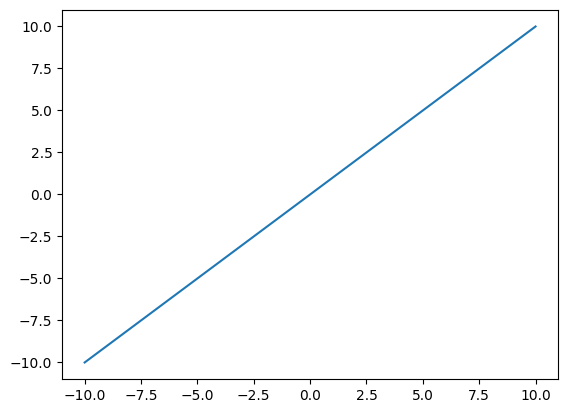

In [65]:

import matplotlib.pyplot as plt # type: ignore

x = np.linspace(-10,10,100)
y=x
plt.plot(x,y)

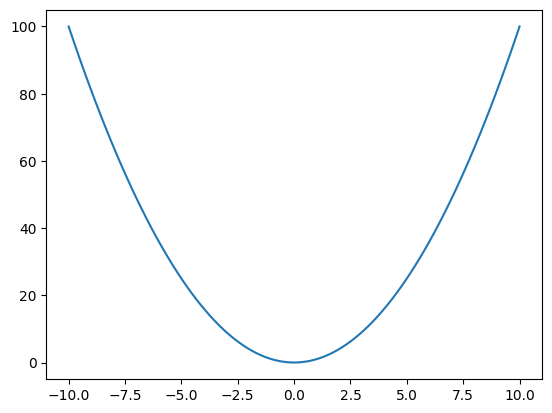

In [63]:
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)

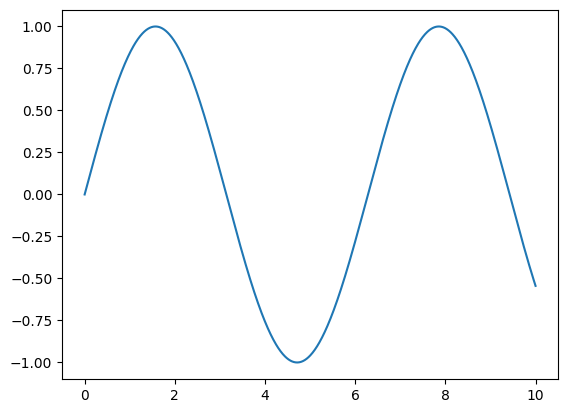

In [66]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)
plt.plot(x,y)

C:\Users\bhaut\AppData\Local\Temp\ipykernel_19120\3687299302.py:2: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


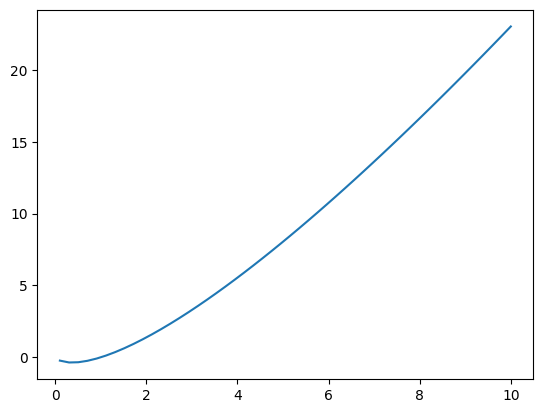

In [67]:
x = np.linspace(-10,10,100)
y = x * np.log(x)
plt.plot(x,y)

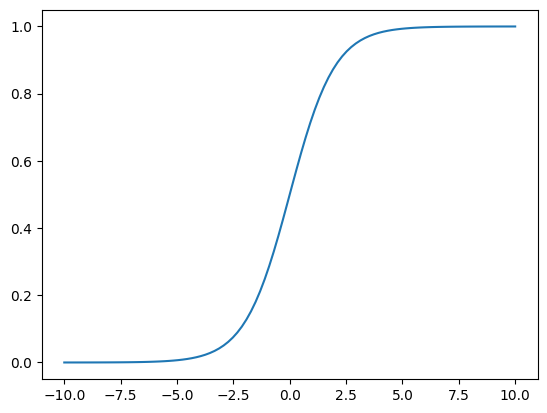

In [68]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plt.plot(x,y)

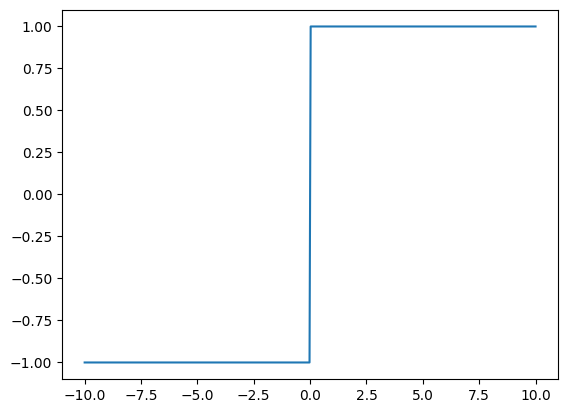

In [69]:
def signum(x):
    return np.sign(x)

# Create an array of x values
x = np.linspace(-10, 10, 400)

# Apply the signum function to the array
y = signum(x)

# Plotting
plt.plot(x, y)

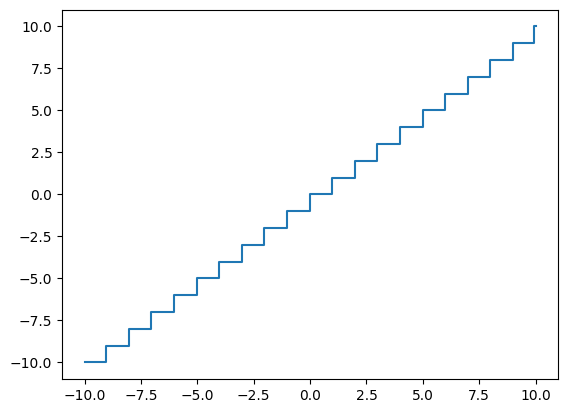

In [70]:
def greatest_integer(x):
    return np.floor(x)

# Create an array of x values (dense range for better visualization)
x = np.linspace(-10, 10, 400)

# Apply the greatest integer function to the array
y = greatest_integer(x)

# Plotting
plt.step(x, y)

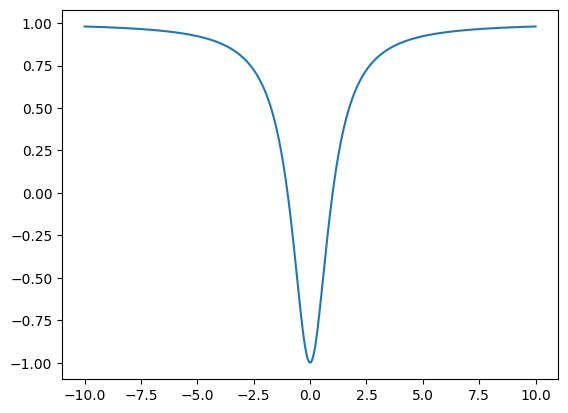

In [73]:
def rational_function(x):
    return (x**2 - 1) / (x**2 + 1)

# Create an array of x values, avoiding the point where the denominator is zero
x = np.linspace(-10, 10, 400)
y = rational_function(x)

# Plotting the rational function
plt.plot(x, y)

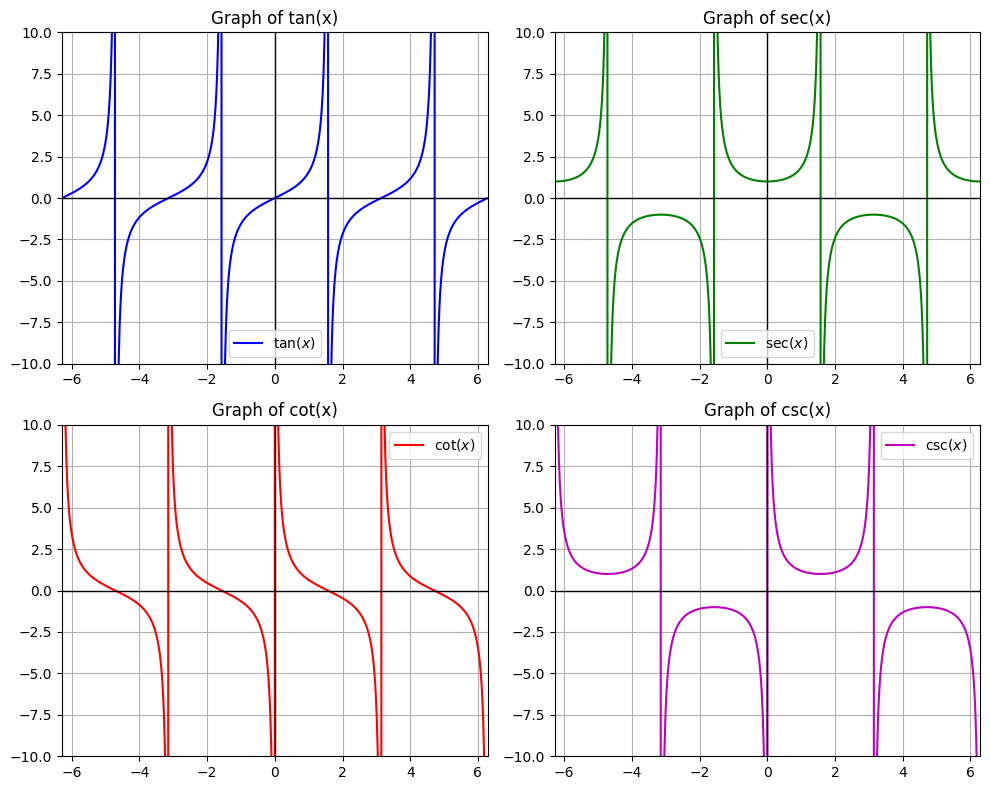

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define the trigonometric functions
def tan_func(x):
    return np.tan(x)

def sec_func(x):
    return 1 / np.cos(x)

def cot_func(x):
    return 1 / np.tan(x)

def csc_func(x):
    return 1 / np.sin(x)

# Create an array of x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# To avoid division by zero for sec, cot, and csc functions, we mask those values
x = x[np.abs(np.cos(x)) > 1e-10]  # Remove points where cos(x) is close to zero
x = x[np.abs(np.sin(x)) > 1e-10]  # Remove points where sin(x) is close to zero

# Plotting the functions
plt.figure(figsize=(10, 8))

# Plot tan(x)
plt.subplot(2, 2, 1)
plt.plot(x, tan_func(x), label=r'$\tan(x)$', color='b')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of tan(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

# Plot sec(x)
plt.subplot(2, 2, 2)
plt.plot(x, sec_func(x), label=r'$\sec(x)$', color='g')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of sec(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

# Plot cot(x)
plt.subplot(2, 2, 3)
plt.plot(x, cot_func(x), label=r'$\cot(x)$', color='r')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of cot(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

# Plot csc(x)
plt.subplot(2, 2, 4)
plt.plot(x, csc_func(x), label=r'$\csc(x)$', color='m')
plt.axhline(0, color='black',linewidth=1)  # x-axis
plt.axvline(0, color='black',linewidth=1)  # y-axis
plt.title('Graph of csc(x)')
plt.ylim(-10, 10)
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


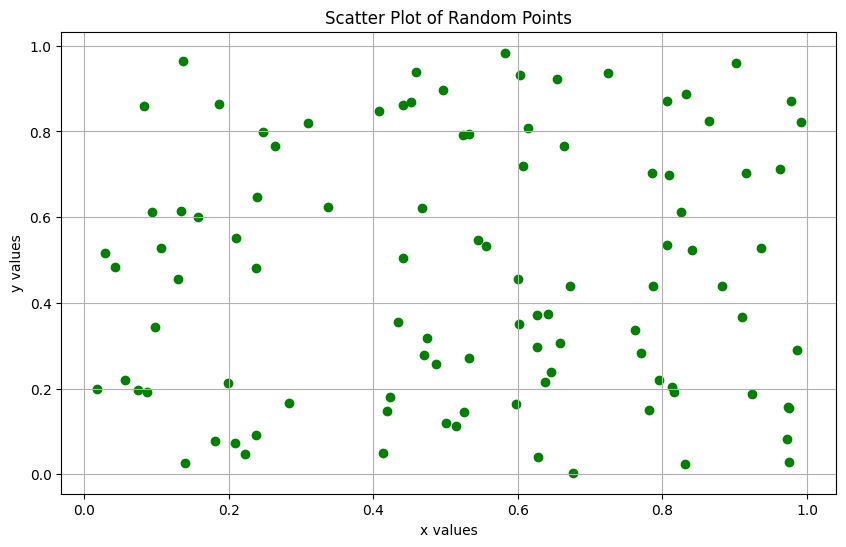

In [75]:
# Generate 100 random points for x and y
x = np.random.rand(100)
y = np.random.rand(100)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green', marker='o')
plt.title('Scatter Plot of Random Points')
plt.xlabel('x values')
plt.ylabel('y values')
plt.grid(True)
plt.show()


C:\Users\bhaut\AppData\Local\Temp\ipykernel_19120\2796828239.py:50: MatplotlibDeprecationWarning: There exists a non-polar current Axes. Therefore, the resulting plot from 'polar()' is non-polar. You likely should call 'polar()' before any other pyplot plotting commands. Support for this scenario is deprecated in 3.10 and will raise an error in 3.12
  plt.polar(theta, r, label='Polar Spiral', color='r')


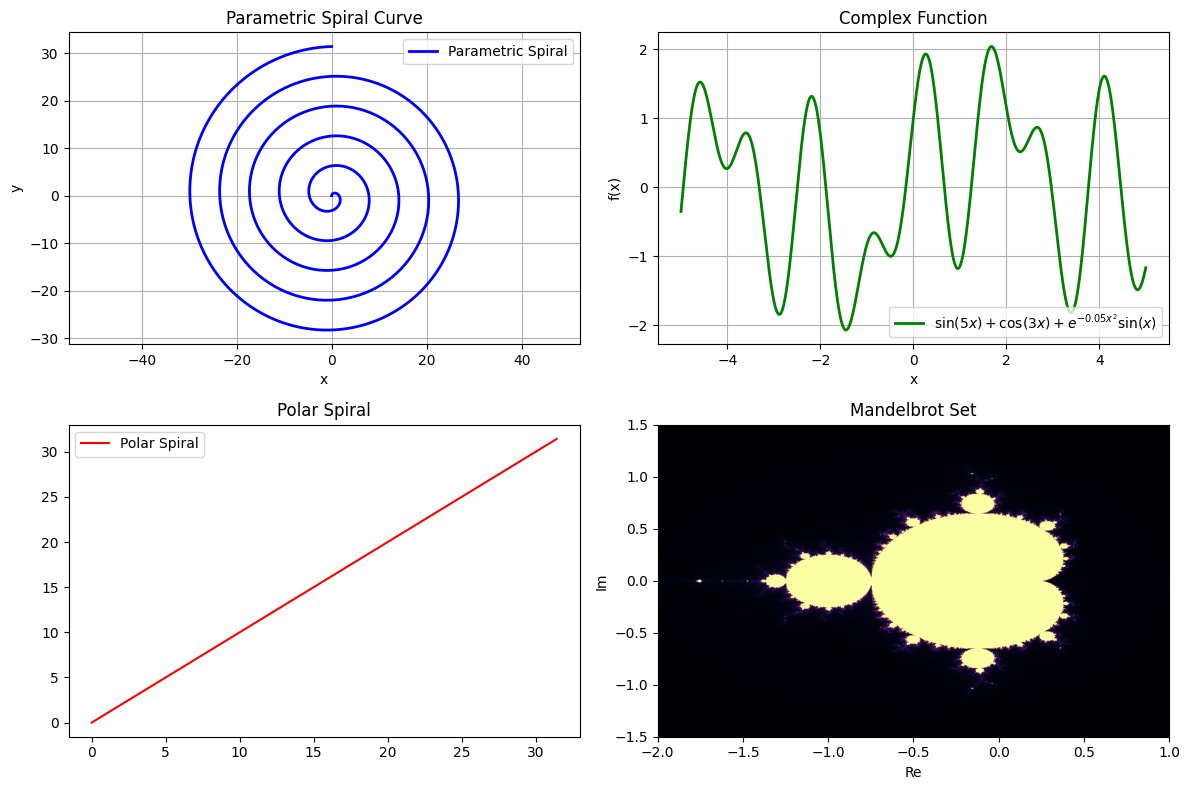

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parametric equations for a spiral
def parametric_spiral(t):
    x = np.sin(t) * t
    y = np.cos(t) * t
    return x, y

# Define a complex function combining multiple elements
def complex_function(x):
    return np.sin(5 * x) + np.cos(3 * x) + np.exp(-0.05 * x**2) * np.sin(x)

# Create the time/parameter range for the spiral and the x range for the complex function
t = np.linspace(0, 10 * np.pi, 1000)
x_vals = np.linspace(-5, 5, 1000)

# Get the values of the parametric spiral
x_spiral, y_spiral = parametric_spiral(t)

# Get the values for the complex function
y_complex = complex_function(x_vals)

# Plotting
plt.figure(figsize=(12, 8))

# Plot parametric spiral
plt.subplot(2, 2, 1)
plt.plot(x_spiral, y_spiral, label='Parametric Spiral', color='b', lw=2)
plt.title('Parametric Spiral Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')
plt.legend()

# Plot complex function (mixture of sin, cos, and exp)
plt.subplot(2, 2, 2)
plt.plot(x_vals, y_complex, label=r'$\sin(5x) + \cos(3x) + e^{-0.05x^2}\sin(x)$', color='g', lw=2)
plt.title('Complex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Plot polar coordinate plot (using parametric equations)
plt.subplot(2, 2, 3)
r = t  # Radial distance is the parameter itself
theta = t  # Angle parameter
plt.polar(theta, r, label='Polar Spiral', color='r')
plt.title('Polar Spiral')
plt.legend()

# Fractal-like pattern (Mandelbrot set iteration)
plt.subplot(2, 2, 4)
# Mandelbrot Set
def mandelbrot(c, max_iter=256):
    z = 0
    for i in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return i
    return max_iter

# Generate points in the complex plane
x_mandelbrot = np.linspace(-2, 1, 800)
y_mandelbrot = np.linspace(-1.5, 1.5, 800)
X, Y = np.meshgrid(x_mandelbrot, y_mandelbrot)
C = X + 1j * Y
Z = np.array([mandelbrot(c) for c in C.flatten()]).reshape(X.shape)

# Plot Mandelbrot Set
plt.imshow(Z, extent=(-2, 1, -1.5, 1.5), cmap='inferno', aspect='auto')
plt.title('Mandelbrot Set')
plt.xlabel('Re')
plt.ylabel('Im')

plt.tight_layout()
plt.show()


<>:65: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:65: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bhaut\AppData\Local\Temp\ipykernel_19120\3172979420.py:65: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title('3D Surface Plot: $f(x, y) = \sin(\sqrt{x^2 + y^2})$')
C:\Users\bhaut\AppData\Local\Temp\ipykernel_19120\3172979420.py:88: SyntaxWarning: invalid escape sequence '\s'
  ax4.set_title('Mathematical Art: $f(x, y) = \sin(x^2 + y^2) \cos(2\pi x)$')


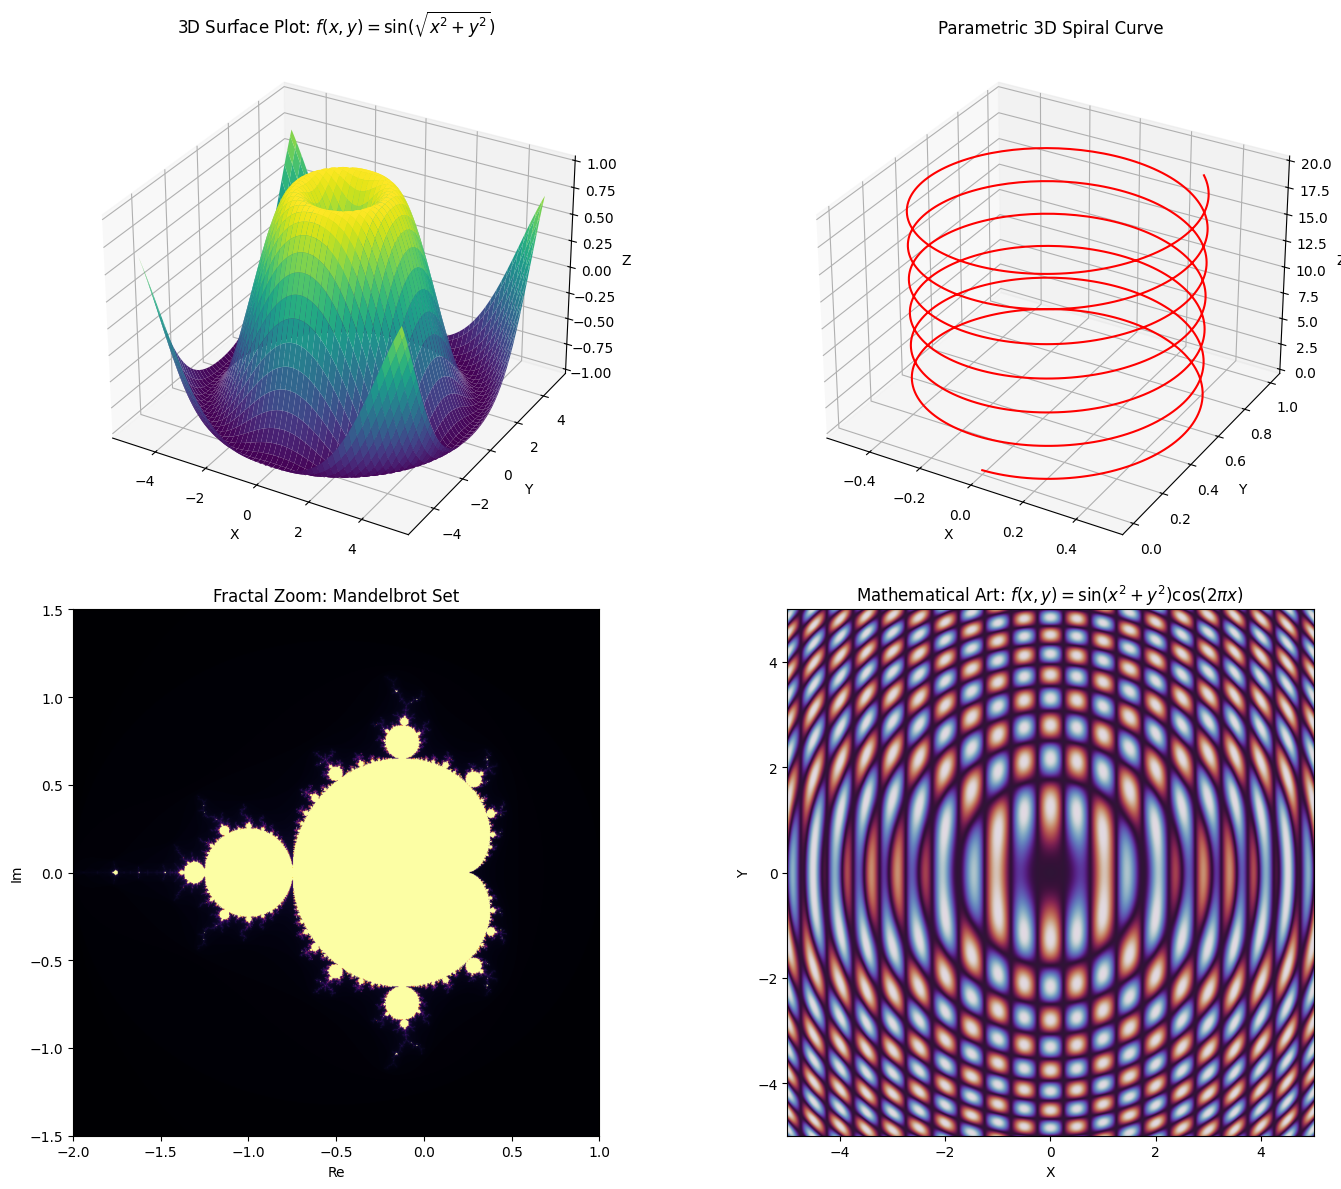

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Complex 3D Surface Plot
def surface_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Create a meshgrid for 3D plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = surface_function(x, y)

# 2. Parametric 3D Spiral Curve
def parametric_spiral_3d(t):
    x = np.sin(t) * np.cos(t)
    y = np.sin(t) * np.sin(t)
    z = t
    return x, y, z

t = np.linspace(0, 20, 1000)
x_spiral, y_spiral, z_spiral = parametric_spiral_3d(t)

# 3. Fractal Zoom (Mandelbrot Set)
def mandelbrot(c, max_iter=256):
    z = 0
    for i in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return i
    return max_iter

# Generate the Mandelbrot set
def generate_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter=256):
    x, y = np.linspace(xmin, xmax, width), np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y
    Z = np.array([mandelbrot(c) for c in C.flatten()]).reshape(X.shape)
    return Z

# Parameters for Mandelbrot zoom
xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
width, height = 800, 800

# Generate Mandelbrot set for zoom effect
mandelbrot_set = generate_mandelbrot(xmin, xmax, ymin, ymax, width, height)

# 4. Mathematical Art
def math_art(x, y):
    return np.sin(x ** 2 + y ** 2) * np.cos(2 * np.pi * x)

# Create meshgrid for art function
x_art = np.linspace(-5, 5, 500)
y_art = np.linspace(-5, 5, 500)
x_art, y_art = np.meshgrid(x_art, y_art)
z_art = math_art(x_art, y_art)

# Plotting the graphs
fig = plt.figure(figsize=(15, 12))

# 3D Surface Plot
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(x, y, z, cmap='viridis')
ax1.set_title('3D Surface Plot: $f(x, y) = \sin(\sqrt{x^2 + y^2})$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Parametric 3D Spiral
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot(x_spiral, y_spiral, z_spiral, label='Parametric Spiral', color='r')
ax2.set_title('Parametric 3D Spiral Curve')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Fractal Zoom: Mandelbrot Set
ax3 = fig.add_subplot(223)
ax3.imshow(mandelbrot_set, cmap='inferno', extent=(xmin, xmax, ymin, ymax))
ax3.set_title('Fractal Zoom: Mandelbrot Set')
ax3.set_xlabel('Re')
ax3.set_ylabel('Im')

# Mathematical Art Pattern
ax4 = fig.add_subplot(224)
ax4.imshow(z_art, cmap='twilight', extent=(-5, 5, -5, 5))
ax4.set_title('Mathematical Art: $f(x, y) = \sin(x^2 + y^2) \cos(2\pi x)$')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')

plt.tight_layout()
plt.show()


C:\Users\bhaut\AppData\Local\Temp\ipykernel_19120\2576748018.py:17: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
C:\Users\bhaut\AppData\Local\Temp\ipykernel_19120\2576748018.py:17: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c


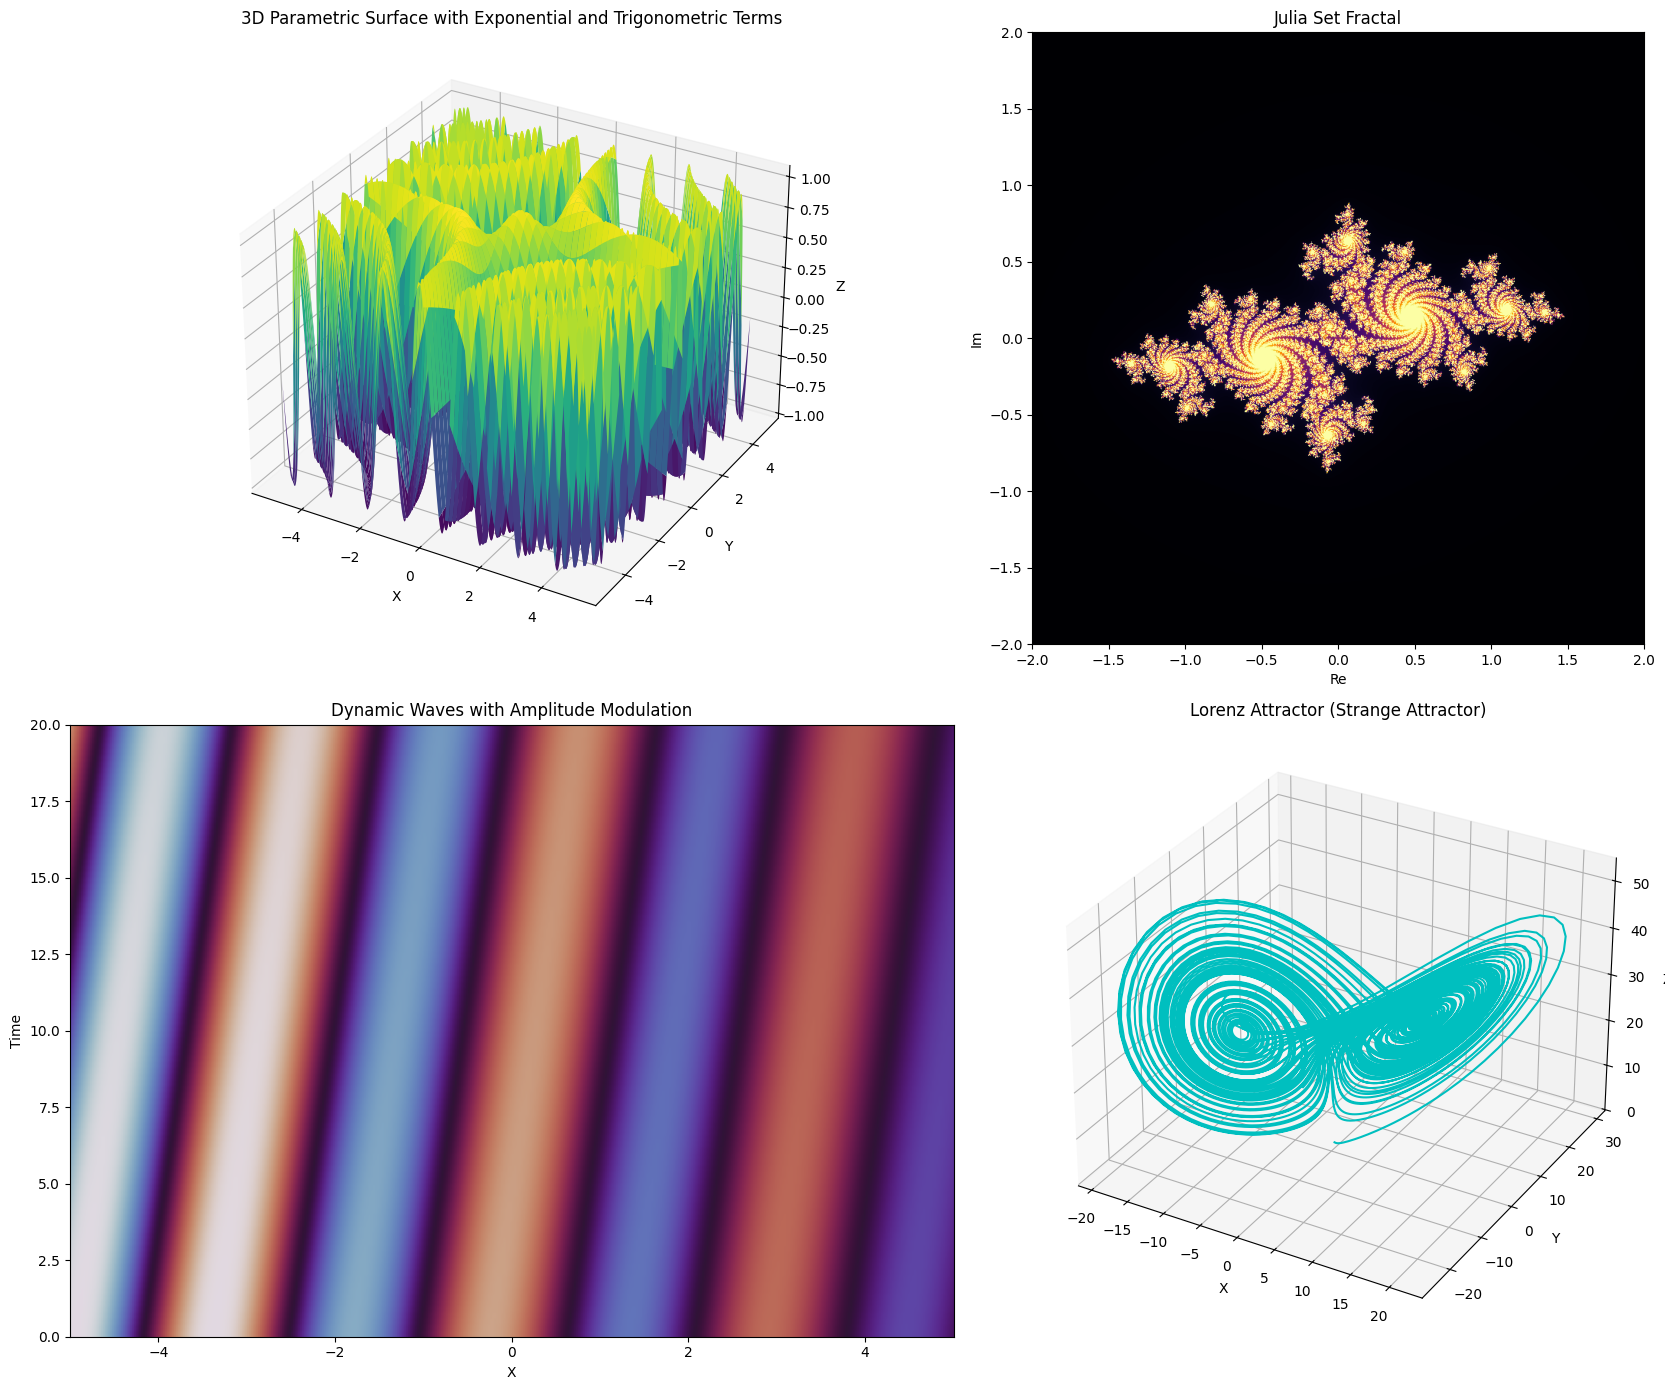

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 1. 3D Parametric Surface with Exponential and Trigonometric Terms
def parametric_surface(x, y):
    return np.sin(x * y) + np.exp(-x**2 - y**2)

# 2. Julia Set Fractal
def julia(c, max_iter=256, xmin=-2, xmax=2, ymin=-2, ymax=2, width=800, height=800):
    x, y = np.linspace(xmin, xmax, width), np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    img = np.zeros(Z.shape, dtype=float)
    for i in range(max_iter):
        Z = Z**2 + c
        mask = np.abs(Z) < 10
        img += mask
    return img

# 3. Dynamic Waves with Amplitude Modulation
def dynamic_wave(x, t, f0=2, modulation_freq=0.1):
    return np.sin(f0 * x + modulation_freq * t) * np.exp(-0.1 * x)

# 4. Strange Attractor (Lorenz System)
def lorenz_attractor(sigma=10, beta=8/3, rho=28, dt=0.01, steps=10000):
    x, y, z = 0., 1., 1.05
    X, Y, Z = [x], [y], [z]
    for _ in range(steps):
        dx = sigma * (y - x) * dt
        dy = (x * (rho - z) - y) * dt
        dz = (x * y - beta * z) * dt
        x += dx
        y += dy
        z += dz
        X.append(x)
        Y.append(y)
        Z.append(z)
    return np.array(X), np.array(Y), np.array(Z)

# Create data
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
x_surface, y_surface = np.meshgrid(x, y)
z_surface = parametric_surface(x_surface, y_surface)

# Julia Set
c = -0.7 + 0.27015j
julia_img = julia(c)

# Dynamic Waves
t_vals = np.linspace(0, 20, 100)
wave_pattern = np.array([dynamic_wave(x, t) for t in t_vals])

# Lorenz Attractor
X_lorenz, Y_lorenz, Z_lorenz = lorenz_attractor()

# Plotting
fig = plt.figure(figsize=(18, 14))

# 1. 3D Parametric Surface
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(x_surface, y_surface, z_surface, cmap='viridis', edgecolor='none')
ax1.set_title('3D Parametric Surface with Exponential and Trigonometric Terms')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# 2. Julia Set Fractal
ax2 = fig.add_subplot(222)
ax2.imshow(julia_img, cmap='inferno', extent=(-2, 2, -2, 2))
ax2.set_title('Julia Set Fractal')
ax2.set_xlabel('Re')
ax2.set_ylabel('Im')

# 3. Dynamic Waves with Amplitude Modulation
ax3 = fig.add_subplot(223)
ax3.imshow(wave_pattern, aspect='auto', cmap=cm.twilight, extent=(-5, 5, 0, 20))
ax3.set_title('Dynamic Waves with Amplitude Modulation')
ax3.set_xlabel('X')
ax3.set_ylabel('Time')

# 4. Strange Attractor (Lorenz System)
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot(X_lorenz, Y_lorenz, Z_lorenz, color='c')
ax4.set_title('Lorenz Attractor (Strange Attractor)')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.tight_layout()
plt.show()


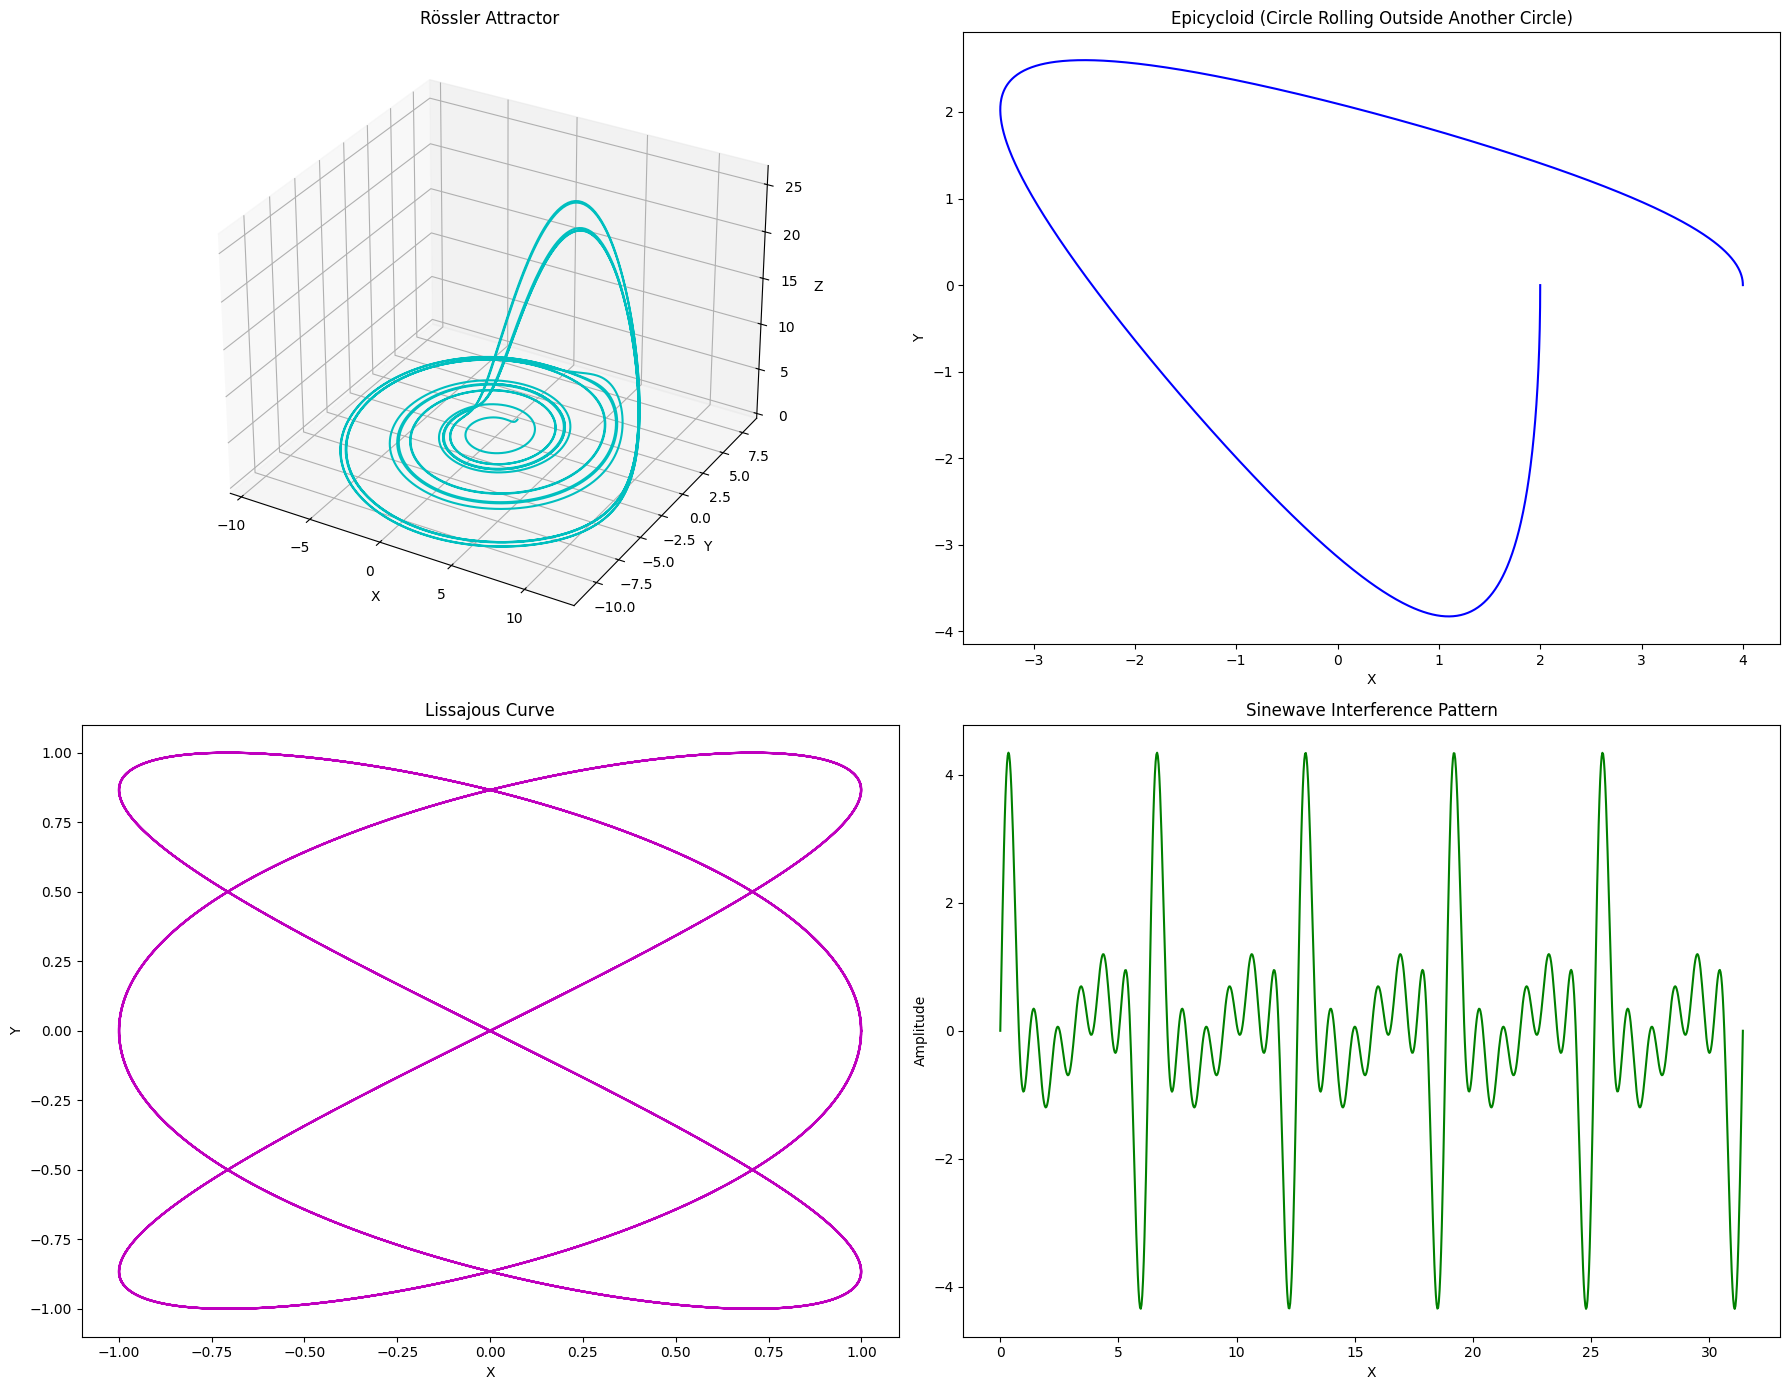

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Rössler Attractor
def rossler_attractor(a=0.2, b=0.2, c=5.7, dt=0.01, steps=10000):
    x, y, z = 1.0, 1.0, 1.0  # Initial conditions
    X, Y, Z = [x], [y], [z]
    
    for _ in range(steps):
        dx = -y - z
        dy = x + a*y
        dz = b + z*(x - c)
        x += dx * dt
        y += dy * dt
        z += dz * dt
        X.append(x)
        Y.append(y)
        Z.append(z)
        
    return np.array(X), np.array(Y), np.array(Z)

# 2. Epicycloid (Circle Rolling Outside Another Circle)
def epicycloid(R, r, d, t):
    x = (R - r) * np.cos(t) + d * np.cos(((R - r) / r) * t)
    y = (R - r) * np.sin(t) - d * np.sin(((R - r) / r) * t)
    return x, y

# 3. Lissajous Curve
def lissajous(a, b, delta, t):
    x = np.sin(a * t + delta)
    y = np.sin(b * t)
    return x, y

# 4. Sinewave Interference Pattern (Multiple Sinewaves)
def sinewave_interference(x, t, num_waves=5):
    interference = np.zeros_like(x)
    for n in range(1, num_waves + 1):
        interference += np.sin(n * x + t)
    return interference

# Create the time variable for animation and plotting
t = np.linspace(0, 10 * np.pi, 1000)  # Time for Lissajous and Sinewave interference
t_rossler = np.linspace(0, 100, 10000)  # Time for Rössler attractor

# 1. Plot Rössler Attractor
X_rossler, Y_rossler, Z_rossler = rossler_attractor()

# 2. Plot Epicycloid
t_epicycloid = np.linspace(0, 2 * np.pi, 1000)
x_epicycloid, y_epicycloid = epicycloid(5, 2, 1, t_epicycloid)

# 3. Plot Lissajous Curve
x_lissajous, y_lissajous = lissajous(3, 2, np.pi / 2, t)

# 4. Plot Sinewave Interference Pattern
x_sinewave = np.linspace(0, 10 * np.pi, 1000)
sine_interference = sinewave_interference(x_sinewave, t, num_waves=5)

# Plotting the graphs
fig = plt.figure(figsize=(18, 14))

# Rössler Attractor 3D Plot
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(X_rossler, Y_rossler, Z_rossler, color='c')
ax1.set_title('Rössler Attractor')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Epicycloid 2D Plot
ax2 = fig.add_subplot(222)
ax2.plot(x_epicycloid, y_epicycloid, color='b')
ax2.set_title('Epicycloid (Circle Rolling Outside Another Circle)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Lissajous Curve 2D Plot
ax3 = fig.add_subplot(223)
ax3.plot(x_lissajous, y_lissajous, color='m')
ax3.set_title('Lissajous Curve')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

# Sinewave Interference Pattern 2D Plot
ax4 = fig.add_subplot(224)
ax4.plot(x_sinewave, sine_interference, color='g')
ax4.set_title('Sinewave Interference Pattern')
ax4.set_xlabel('X')
ax4.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


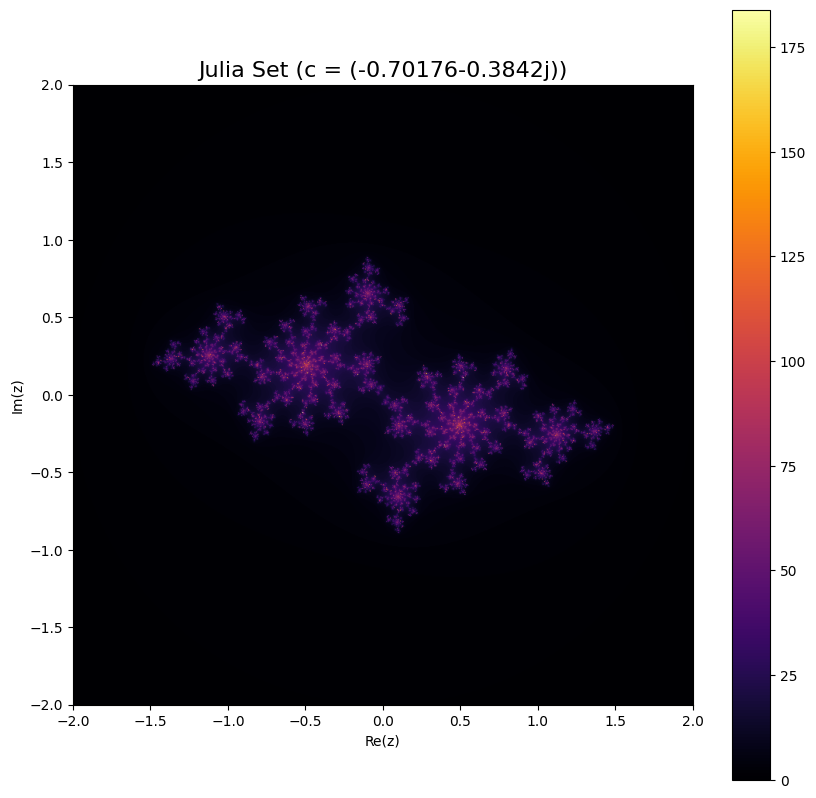

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Julia set function
def julia(c, max_iter):
    def func(z):
        return z**2 + c
    
    def compute(z):
        n = 0
        while abs(z) <= 2 and n < max_iter:
            z = func(z)
            n += 1
        return n
    
    return compute

# Set up the grid
width, height = 800, 800
max_iter = 256

# Define the real and imaginary parts of the grid
x_min, x_max = -2.0, 2.0
y_min, y_max = -2.0, 2.0

real_vals = np.linspace(x_min, x_max, width)
imag_vals = np.linspace(y_min, y_max, height)

# Create a grid of complex numbers
image = np.zeros((height, width))

# Define the complex constant 'c'
c = complex(-0.70176, -0.3842)  # You can change this to explore different Julia sets

# Generate the Julia set fractal
for i in range(height):
    for j in range(width):
        z = complex(real_vals[j], imag_vals[i])
        image[i, j] = julia(c, max_iter)(z)

# Plot the Julia set
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='inferno', extent=(x_min, x_max, y_min, y_max))
plt.colorbar()
plt.title(f"Julia Set (c = {c})", fontsize=16)
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()


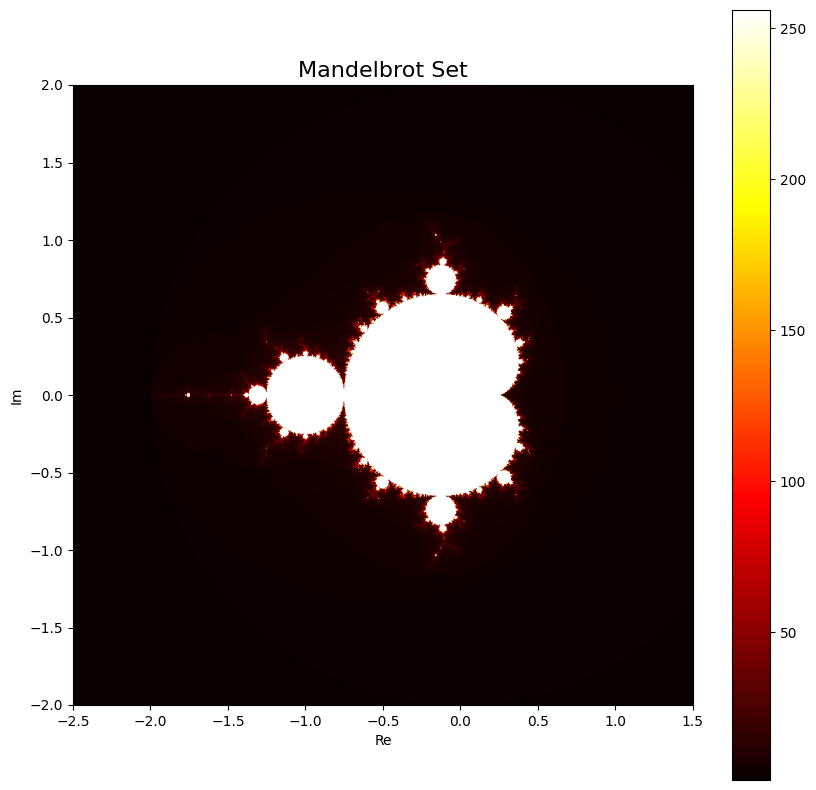

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to generate the Mandelbrot set
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

# Set the size of the image and limits for the complex plane
width, height = 800, 800
xmin, xmax, ymin, ymax = -2.5, 1.5, -2.0, 2.0
max_iter = 256

# Generate the complex plane
x, y = np.linspace(xmin, xmax, width), np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y  # Create complex grid

# Vectorize the mandelbrot function for efficiency
vectorized_mandelbrot = np.vectorize(lambda c: mandelbrot(c, max_iter))
Z = vectorized_mandelbrot(C)

# Plotting the Mandelbrot Set
plt.figure(figsize=(10, 10))
plt.imshow(Z, cmap='hot', extent=(xmin, xmax, ymin, ymax))
plt.colorbar()
plt.title('Mandelbrot Set', fontsize=16)
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


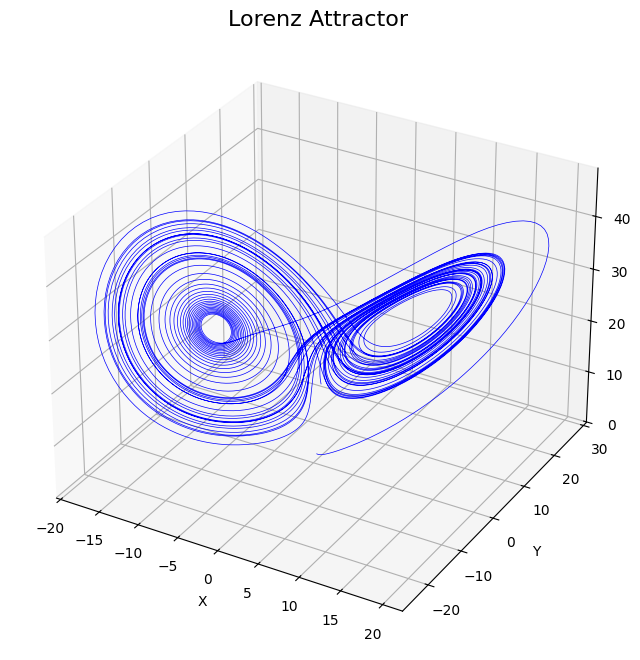

In [6]:


from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Lorenz system parameters
sigma = 10
rho = 28
beta = 8 / 3

# Define the Lorenz system
def lorenz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial state
initial_state = [0.0, 1.0, 1.05]

# Time points
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the system
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)

# Plotting the Lorenz attractor
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the attractor
ax.plot(solution.y[0], solution.y[1], solution.y[2], color='b', lw=0.5)
ax.set_title('Lorenz Attractor', fontsize=16)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
